In [21]:
# Imports

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import keras
import keras.layers
import keras.objectives
import keras.metrics
import keras.models

from tensorflow.examples.tutorials.mnist import input_data

In [22]:
# Load the MNIST data
mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz


Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [23]:
# this placeholder will contain our input digits, as flat vectors
img = tf.placeholder(tf.float32, shape=(None, 784))

In [24]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_dim=784))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

preds = model(img)

In [25]:
# Get 9 images to get the inference for
inf_images = mnist_data.test.images[:9]

sess = tf.Session()

# Initialize all variables
init_op = tf.global_variables_initializer()

with sess.as_default():
    # Restore variables from disk.
    sess.run(init_op)       
    model.load_weights('./concepts/tensorflow-tutorial/nmist.h5')
    
    inf_labels = sess.run(preds, feed_dict={img: inf_images})
    
print (inf_labels)

[[  1.91266011e-07   1.09380353e-05   1.86345918e-04   1.35149734e-04
    7.40836281e-09   1.72794535e-06   1.72381642e-09   9.99650121e-01
    9.13516669e-06   6.32785941e-06]
 [  7.19156787e-08   4.23536228e-04   9.99398828e-01   1.69485429e-04
    4.38668586e-08   6.84168384e-08   1.51741048e-07   5.22544951e-06
    2.44687794e-06   8.89754881e-10]
 [  4.14131250e-07   9.99600112e-01   1.52102366e-04   1.39300564e-05
    4.89010818e-05   6.33142372e-06   1.05504259e-05   1.35443101e-04
    2.89344935e-05   3.32323475e-06]
 [  9.89194989e-01   1.02978855e-04   3.89271905e-03   1.10550900e-04
    2.39254965e-04   2.31614933e-04   2.13391101e-03   3.01136775e-03
    7.56544250e-05   1.00710080e-03]
 [  4.48051105e-05   5.41012014e-06   9.94297952e-05   9.51784932e-06
    9.64598656e-01   3.62708233e-05   3.88250657e-04   5.35348896e-04
    3.39541111e-05   3.42484973e-02]
 [  3.59753400e-08   9.99918222e-01   1.42632498e-05   1.58799776e-06
    1.11422560e-05   2.91294555e-07   3.97804

In [26]:
# Code to draw the images nicely

# We know that MNIST images are 28 pixels in each dimension.
img_size = 28
# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size
# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)
# Number of classes, one class for each of 10 digits.
num_classes = 10

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

[7 2 1 0 4 1 4 9 6]


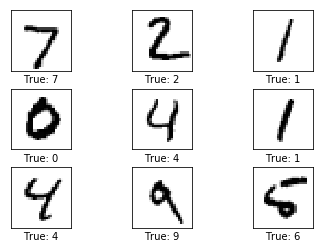

In [27]:
# Get the highest probability labels as the predicted digit 
pred_classes = np.array([label.argmax() for label in inf_labels])
print(pred_classes)

# Plot the images and labels using our helper-function above.
plot_images(images=inf_images, cls_true=pred_classes)